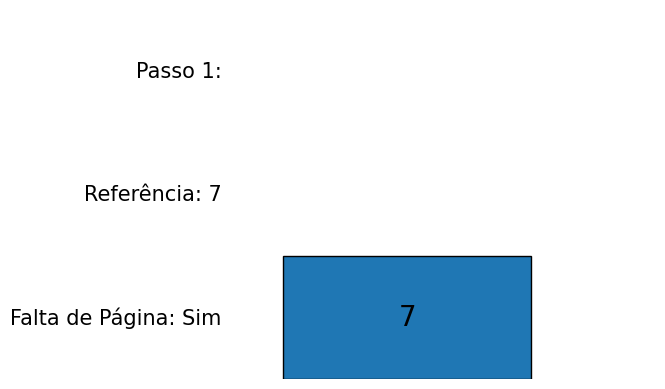

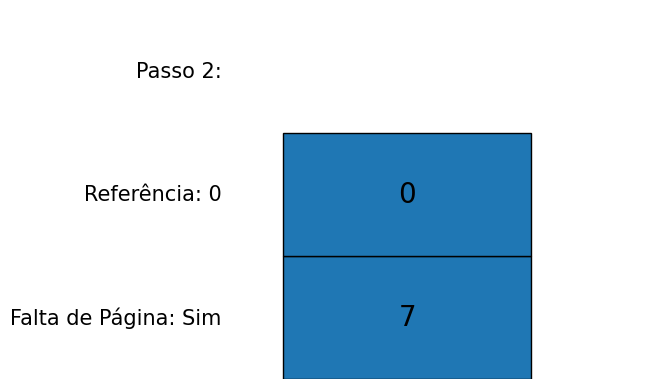

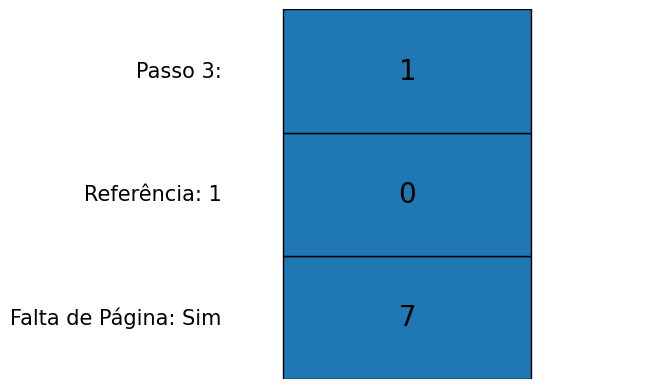

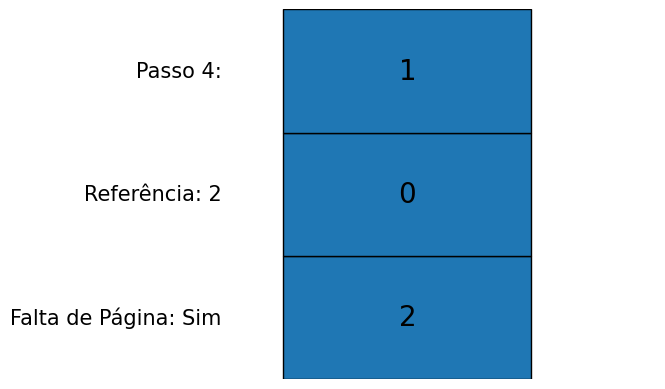

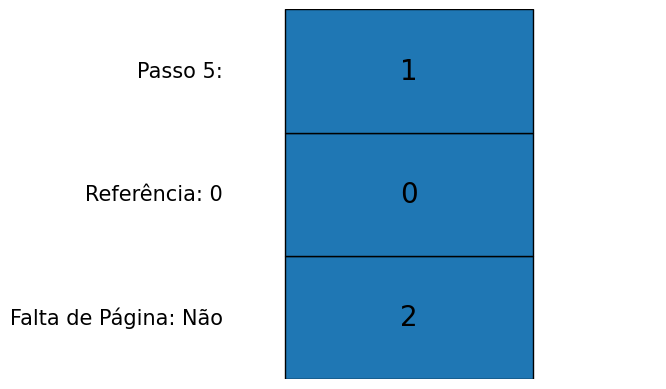

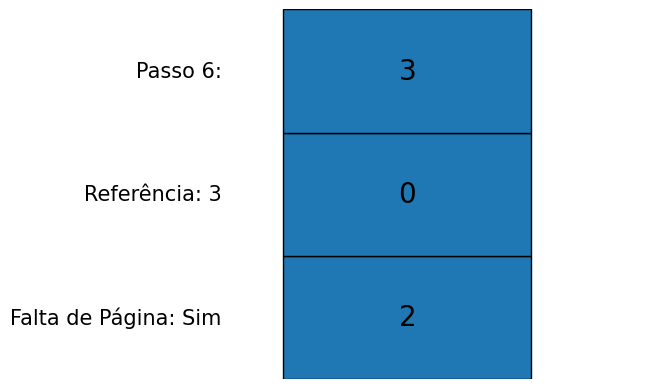

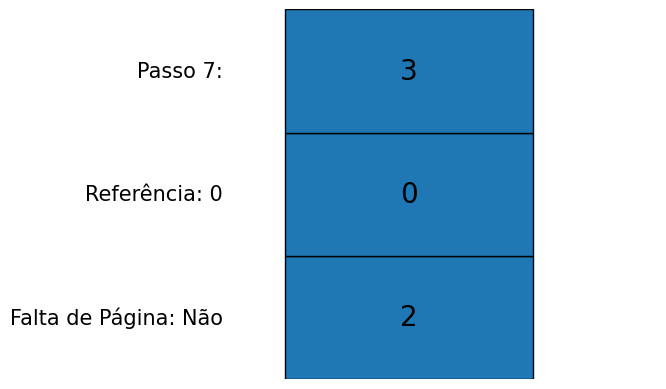

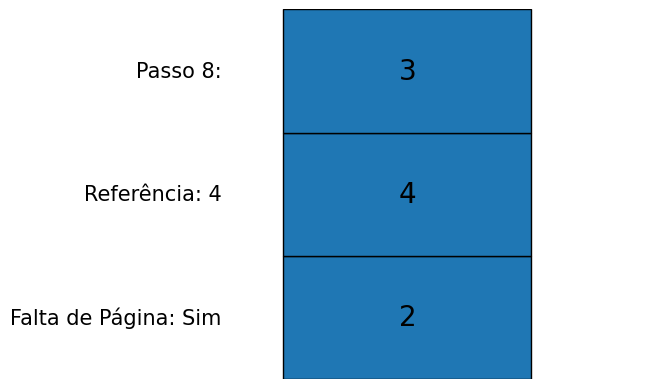

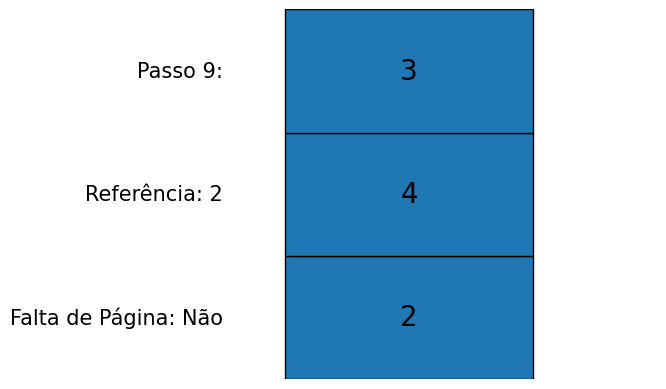

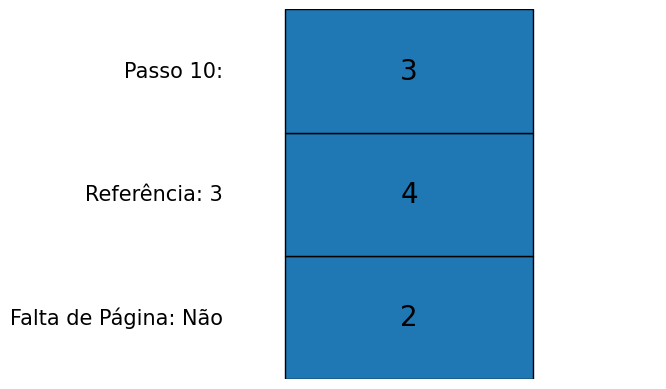

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_frames(reference, frames, page_fault, step):
    fig, ax = plt.subplots()

    # Configurar o tamanho do gráfico
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 3)

    # Adicionar molduras
    for i in range(len(frames)):
        ax.add_patch(patches.Rectangle((1, i), 2, 1, fill=True, edgecolor='black'))
        ax.text(2, i + 0.5, str(frames[i]), fontsize=20, va='center', ha='center')

    # Adicionar informações do passo
    ax.text(0.5, 2.5, f"Passo {step}:", fontsize=15, va='center', ha='right')
    ax.text(0.5, 1.5, f"Referência: {reference}", fontsize=15, va='center', ha='right')
    ax.text(0.5, 0.5, f"Falta de Página: {'Sim' if page_fault else 'Não'}", fontsize=15, va='center', ha='right')

    ax.axis('off')
    plt.show()

# Simulação do algoritmo
pages = [7, 0, 1, 2, 0, 3, 0, 4, 2, 3]
frames = []
num_frames = 3
step = 1

for i in range(len(pages)):
    reference = pages[i]
    if reference not in frames:
        if len(frames) < num_frames:
            frames.append(reference)
        else:
            # Decisão de substituição
            farthest = -1
            page_to_replace = -1
            for f in frames:
                if f not in pages[i+1:]:
                    page_to_replace = f
                    break
                else:
                    index = pages[i+1:].index(f)
                    if index > farthest:
                        farthest = index
                        page_to_replace = f
            frames[frames.index(page_to_replace)] = reference

        page_fault = True
    else:
        page_fault = False

    # Plotar a configuração atual das molduras
    plot_frames(reference, frames, page_fault, step)
    step += 1
